# Table of Content
1. Import linraries and dataset
2. Data cleaning
3. Data preparation for regression analysis
4. Regression analysis - Hypothesis 1
5. Regression analysis - Hypothesis 2
6. Regression analysis - Hypothesis 3

# 1. Import libraries and dataset

In [53]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
# Defining path for data import
path = r'/Users/frederikeschulz-mullensiefen/Desktop/Masterfolder_Hotel Bookings'

In [55]:
# Import cleaned hotel bookings dataset 
df_bookings = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'hotel_bookings_cleaned2_wrangled.pkl'))

In [56]:
# Display settings for graphs and tables
pd.set_option('display.max_columns', None)
%matplotlib inline

In [57]:
# Displaying head of dataframe
df_bookings.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,reservation_status,total_guests,total_number_nights
2,Resort Hotel,0,7,2015,July,27,0,1,1,0.0,0,BB,GBR,0,0,0,0,No Deposit,0,Transient,75.0,Check-Out,1.0,1
3,Resort Hotel,0,13,2015,July,27,0,1,1,0.0,0,BB,GBR,0,0,0,0,No Deposit,0,Transient,75.0,Check-Out,1.0,1
4,Resort Hotel,0,14,2015,July,27,0,2,2,0.0,0,BB,GBR,0,0,0,0,No Deposit,0,Transient,98.0,Check-Out,2.0,2
5,Resort Hotel,0,14,2015,July,27,0,2,2,0.0,0,BB,GBR,0,0,0,0,No Deposit,0,Transient,98.0,Check-Out,2.0,2
6,Resort Hotel,0,0,2015,July,27,0,2,2,0.0,0,BB,PRT,0,0,0,0,No Deposit,0,Transient,107.0,Check-Out,2.0,2
7,Resort Hotel,0,9,2015,July,27,0,2,2,0.0,0,FB,PRT,0,0,0,0,No Deposit,0,Transient,103.0,Check-Out,2.0,2
8,Resort Hotel,1,85,2015,July,27,0,3,2,0.0,0,BB,PRT,0,0,0,0,No Deposit,0,Transient,82.0,Canceled,2.0,3
9,Resort Hotel,1,75,2015,July,27,0,3,2,0.0,0,HB,PRT,0,0,0,0,No Deposit,0,Transient,105.5,Canceled,2.0,3
10,Resort Hotel,1,23,2015,July,27,0,4,2,0.0,0,BB,PRT,0,0,0,0,No Deposit,0,Transient,123.0,Canceled,2.0,4
11,Resort Hotel,0,35,2015,July,27,0,4,2,0.0,0,HB,PRT,0,0,0,0,No Deposit,0,Transient,145.0,Check-Out,2.0,4


# 2. Data cleaning
Data Cleaning has already been conducted in previous project phases. Therefore, no further data cleaning necessary.

# 3. Data preparation for regression analysis

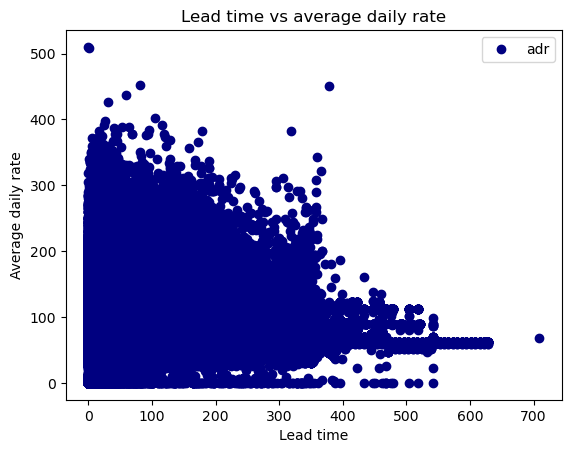

In [58]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df_bookings.plot(x = 'lead_time', y='adr', color = 'navy', style='o') 
plt.title('Lead time vs average daily rate')  
plt.xlabel('Lead time')  
plt.ylabel('Average daily rate')  
plt.show()

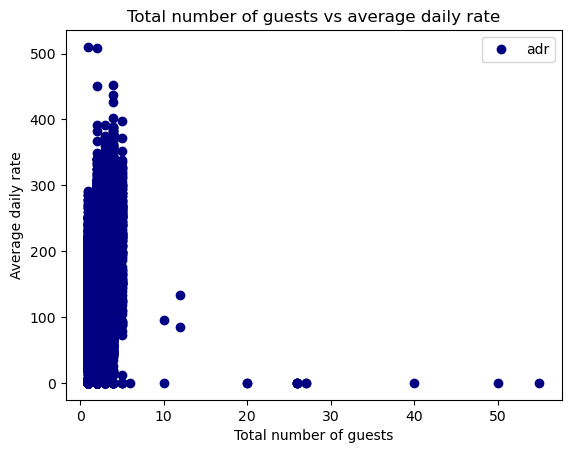

In [59]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df_bookings.plot(x = 'total_guests', y='adr', color = 'navy', style='o') 
plt.title('Total number of guests vs average daily rate')  
plt.xlabel('Total number of guests')  
plt.ylabel('Average daily rate')  
plt.show()

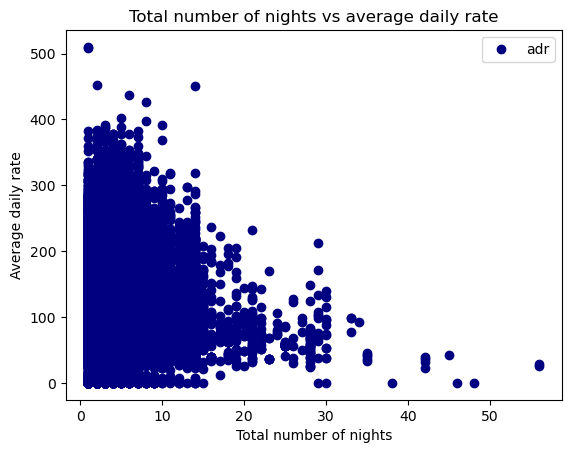

In [60]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df_bookings.plot(x = 'total_number_nights', y='adr', color = 'navy', style='o') 
plt.title('Total number of nights vs average daily rate')  
plt.xlabel('Total number of nights')  
plt.ylabel('Average daily rate')  
plt.show()

#### Hypothesis

1. If the lead time increases, then the adr descreases.
2. If the number of guests per booking increases, then the adr will increase.  
3. If the duration of stay increases, then the adr will decrease. 

# 4. Regression analysis - Hypothesis 1

In [61]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_bookings['lead_time'].values.reshape(-1,1)
y = df_bookings['adr'].values.reshape(-1,1)

In [62]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [63]:
# Create a regression object.
regression = LinearRegression() 

In [64]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [65]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

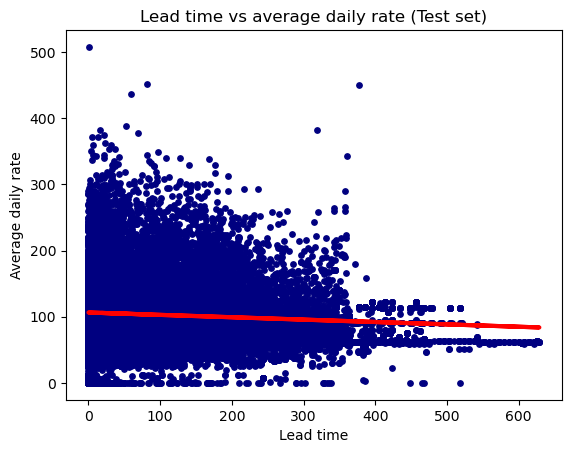

In [66]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='navy', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Lead time vs average daily rate (Test set)')
plot_test.xlabel('Lead time')
plot_test.ylabel('Average daily rate')
plot_test.show()

#### Intepretation scatter plot
As can be seen in the scatter plot above, the regression line does not cover well all data points. Especially where the lead time is small, there are still many observations with a low daily rate, which contradicts the hypothesis.

In [67]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [68]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.03589756]]
Mean squared error:  2229.7602964245502
R2 score:  0.006177791750189621


In [69]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,111.60,103.641163
1,115.00,106.010402
2,175.00,106.477070
3,162.00,105.795016
4,135.00,98.651401
5,112.00,98.364221
6,150.00,106.189889
7,138.60,102.205260
8,113.00,105.292450
9,101.50,102.815519


#### Model performance interpretation

The slope suggests a negative relationship, which is in line with the hypothesis - as the lead time of booking a hotel rises, the average daily rate slightly drops (at a degree of 0.036).

However, the mse of 2229.76 is very large, which indicates that the regression line is not an accurate representation of the data. Moreover, the r2 score of 0.006 indicates that the model does not fit well, as it is very close to zero. This is also reflected when comparing the actual and predicted values, as there is quite the difference in the values. 
This shows, that the model is not performing well and is not explaining the relationship between the lead time and the adr variables. The relationship does not follow a single straight regression line, which means that it won't accurately predict anything. 

# 5. Regression analysis - Hypothesis 2

In [70]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X1 = df_bookings['total_guests'].values.reshape(-1,1)
y1 = df_bookings['adr'].values.reshape(-1,1)

In [71]:
# Split data into a training set and a test set.

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [72]:
# Create a regression object.
regression1 = LinearRegression() 

In [73]:
# Fit the regression object onto the training set.
regression1.fit(X1_train, y1_train)

LinearRegression()

In [74]:
# Predict the values of y using X.
y1_predicted = regression1.predict(X1_test)

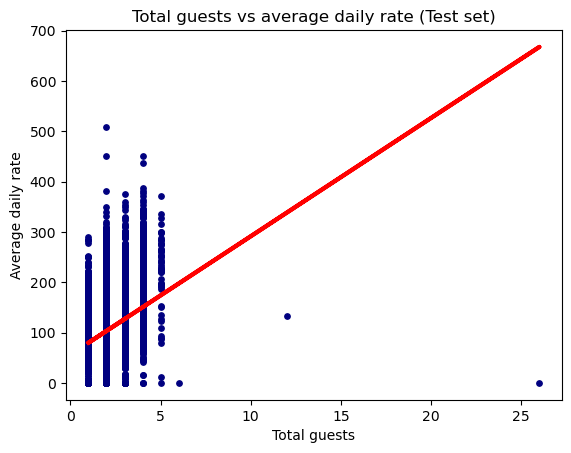

In [75]:
# Create a plot that shows the regression line from the model on the test set.

plot_test1 = plt
plot_test1.scatter(X1_test, y1_test, color='navy', s = 15)
plot_test1.plot(X1_test, y1_predicted, color='red', linewidth =3)
plot_test1.title('Total guests vs average daily rate (Test set)')
plot_test1.xlabel('Total guests')
plot_test1.ylabel('Average daily rate')
plot_test1.show()

In [76]:
# Create objects that contain the model summary statistics.

rmse1 = mean_squared_error(y1_test, y1_predicted) 
r21 = r2_score(y1_test, y1_predicted) 

In [77]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression1.coef_)
print('Mean squared error: ', rmse1)
print('R2 score: ', r21)

Slope: [[23.51672992]]
Mean squared error:  1856.1386101429766
R2 score:  0.17270400082556747


In [78]:
# Create a dataframe comparing the actual and predicted values of y.

data1 = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_predicted.flatten()})
data1.head(30)

,Actual,Predicted
0,111.60,126.869516
1,115.00,79.836056
2,175.00,103.352786
3,162.00,126.869516
4,135.00,103.352786
5,112.00,103.352786
6,150.00,103.352786
7,138.60,103.352786
8,113.00,103.352786
9,101.50,103.352786


#### Model performance interpretation

The slope suggests a positive relationship, which is in line with the hypothesis - as the number of guests of a booking rises, the average daily rate rises as well (at a degree of 23.51).

However, the mse of 1856.14 is very large, which indicates that the regression line is not an accurate representation of the data. Moreover, the r2 score of 0.17 indicates that the model does not fit well, as it is very close to zero. This is also reflected when comparing the actual and predicted values, as there is quite the difference in the values. 
This shows, that the model is not performing well and is not explaining the relationship between the total number of guests and the adr variables. The relationship does not follow a single straight regression line, which means that it won't accurately predict anything. 

# 6. Regression analysis - Hypothesis 3

In [79]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X2 = df_bookings['total_number_nights'].values.reshape(-1,1)
y2 = df_bookings['adr'].values.reshape(-1,1)

In [80]:
# Split data into a training set and a test set.

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [81]:
# Create a regression object.
regression2 = LinearRegression() 

In [82]:
# Fit the regression object onto the training set.
regression2.fit(X2_train, y2_train)

LinearRegression()

In [83]:
# Predict the values of y using X.
y2_predicted = regression2.predict(X2_test)

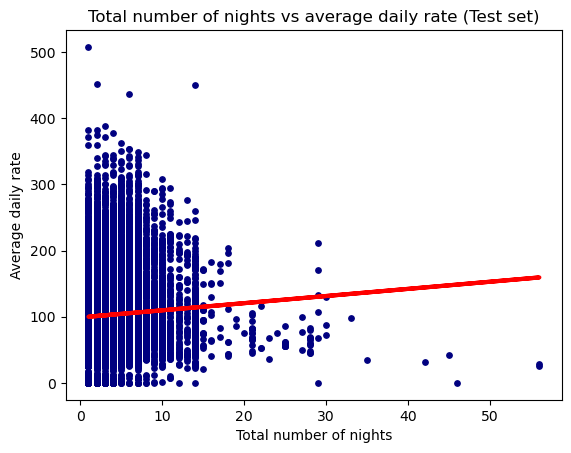

In [84]:
# Create a plot that shows the regression line from the model on the test set.

plot_test2 = plt
plot_test2.scatter(X2_test, y2_test, color='navy', s = 15)
plot_test2.plot(X2_test, y2_predicted, color='red', linewidth =3)
plot_test2.title('Total number of nights vs average daily rate (Test set)')
plot_test2.xlabel('Total number of nights')
plot_test2.ylabel('Average daily rate')
plot_test2.show()

In [85]:
# Create objects that contain the model summary statistics.

rmse2 = mean_squared_error(y2_test, y2_predicted) 
r22 = r2_score(y2_test, y2_predicted) 

In [86]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression2.coef_)
print('Mean squared error: ', rmse2)
print('R2 score: ', r22)

Slope: [[1.0801618]]
Mean squared error:  2235.781653662383
R2 score:  0.0034940241019989493


In [87]:
# Create a dataframe comparing the actual and predicted values of y.

data2 = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})
data2.head(30)

,Actual,Predicted
0,111.60,103.314758
1,115.00,103.314758
2,175.00,100.074273
3,162.00,101.154435
4,135.00,101.154435
5,112.00,102.234596
6,150.00,100.074273
7,138.60,104.394920
8,113.00,100.074273
9,101.50,101.154435


#### Model performance interpretation

The slope suggests a positive relationship, which is in line with the hypothesis - as the number of nights of a booking rises, the average daily rate rises as well (at a degree of 1.08).

However, the mse of 2235.78 is very large, which indicates that the regression line is not an accurate representation of the data. Moreover, the r2 score of 0.003 indicates that the model does not fit well, as it is very close to zero. This is also reflected when comparing the actual and predicted values, as there is quite the difference in the values. 
This shows, that the model is not performing well and is not explaining the relationship between the number of nights and the adr variables. The relationship does not follow a single straight regression line, which means that it won't accurately predict anything. 